## Proyecto: Costo de viviendas en Boston USA.
(Jorge Paz C.)

Nota: La base de datos se tomo de un curso tomado en coursera.

<p>There is access to data from an agency in Boston, Massachusetts, on housing prices derived from the US Census service.</p> 

<p>We would like to get an idea of ​​what follows:</p>

<ol>
    <li>Is there a significant difference in the median value of houses bounded by the Charles river or not?</li>
    <li>Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?</li>
    <li>Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?</li>
    <li>What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?</li>
</ol>

In [7]:
import pip
pip.main(['install', 'numpy', 'pandas', 'seaborn', 'scipy', 'statsmodels'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: numpy in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (2.0.0)

Requirement already satisfied: pandas in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (2.2.2)

Requirement already satisfied: seaborn in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (0.13.2)

Collecting scipy

Downloading scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)

C:\Users\Jorge Paz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\rich\live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Collecting statsmodels

Downloading statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)

Requirement already satisfied: python-dateutil>=2.8.2 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from pandas) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from pandas) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from pandas) (2024.1)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (3.9.1)

Collecting patsy>=0.5.6 (from statsmodels)

Downloading patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)

Requirement already satisfied: packaging>=21.3 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from statsmodels) (24.0)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.1)

Requirement already satisfied: cycler>=0.10 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.53.1)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: pillow>=8 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.2)

Requirement already satisfied: six in c:\users\jorge paz\appdata\local\programs\python\python312\lib\site-packages (from patsy>=0.5.6->statsmodels) (1.16.0)

Downloading scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)

Downloading statsmodels-0.14.2-cp312-cp312-win_amd64.whl (9.8 MB)

Downloading patsy-0.5.6-py2.py3-none-any.whl (233 kB)

Installing collected packages: scipy, patsy, statsmodels

Successfully installed patsy-0.5.6 scipy-1.14.0 statsmodels-0.14.2

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

0

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)

In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [13]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

<h3>We now become familiar with the dataset</h3>

In [19]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [20]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


<h3>For the "Median value of owner-occupied homes" we can provide a boxplot</h3>

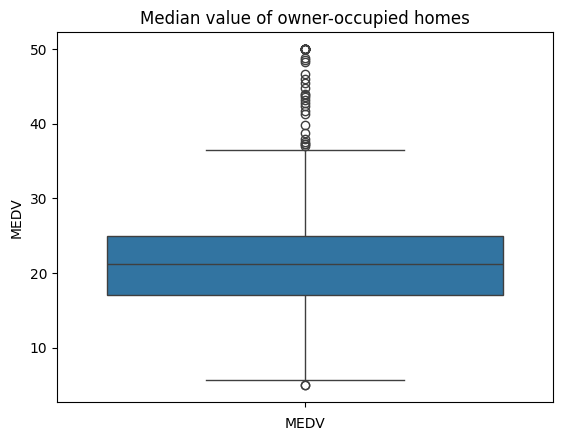

In [21]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
plt.xlabel('MEDV')
plt.title('Median value of owner-occupied homes')
plt.show()

We can see that the median is almost 21. And there's some outliers over the maximum value. We can see the median by the pd method below.

In [22]:
boston_df['MEDV'].median()

np.float64(21.2)

<h3>Now, let's draw a bar plot for the Charles river variable</h3>

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

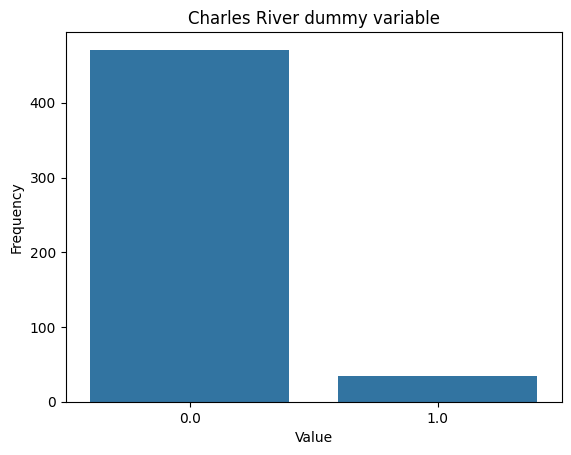

In [23]:
counts = boston_df['CHAS'].value_counts()

sns.barplot(x = counts.index, y = counts.values)
plt.title('Charles River dummy variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<h3>Lets provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</h3>

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

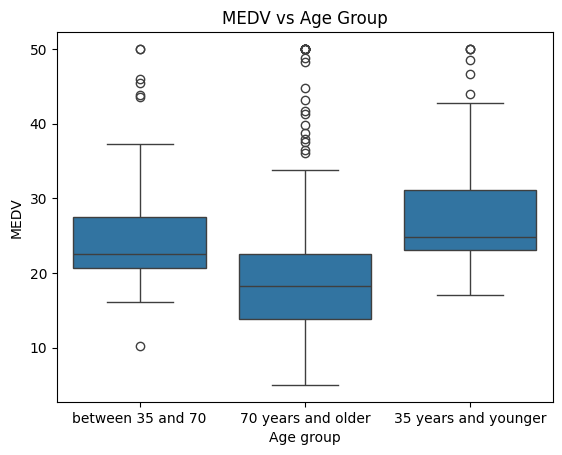

In [25]:
sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
plt.title('MEDV vs Age Group')
plt.xlabel('Age group')
plt.ylabel('MEDV')
plt.show()

In [26]:
boston_df['age_group'].value_counts()

age_group
70 years and older      287
between 35 and 70       128
35 years and younger     91
Name: count, dtype: int64

We can see that the most frequently age is 70 and beyond. For the boxplot. We can see that the median of that group is almost in the bottom of the box, but this have the greatest values of MEDV. The variability of each box are not so distinct each other. 

We need to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? So lets draw a scatter plot for it.

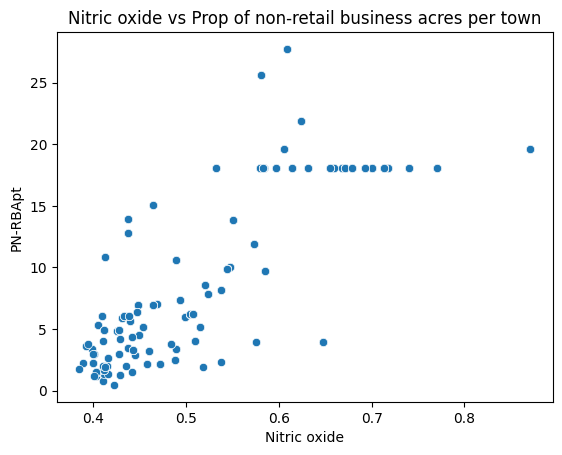

In [27]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title('Nitric oxide vs Prop of non-retail business acres per town')
plt.xlabel('Nitric oxide')
plt.ylabel('PN-RBApt')
plt.show()

We can see that they have a positive correlation.

Now, lets see the pupil to teacher ratio variable with a histogram.

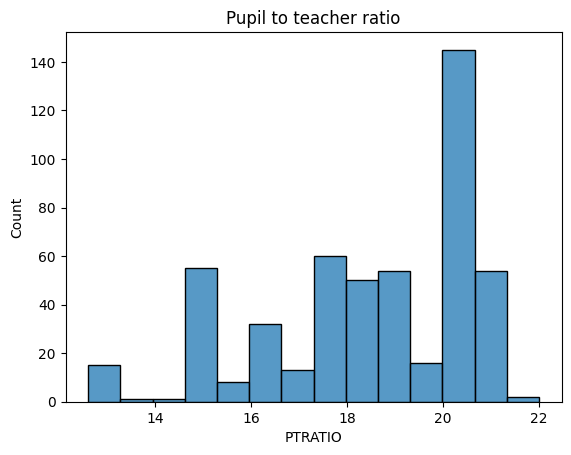

In [29]:
sns.histplot(x = 'PTRATIO', data = boston_df)
plt.title('Pupil to teacher ratio')
plt.show()

Now, lets ask some questions:

<h3>Is there a significant difference in median value of houses bounded by the Charles river or not?</h3>

Lets do a T - test for independent samples

First of all, lets set our hypothesis:

1. $H_0$: Median has no significant difference between houses bounded by the Charles river.
2. $H_1$: Median has a significant difference between houses bounded by the Charles river.

Let's draw the distplot for the mean values MEDV:

C:\Users\Jorge Paz\AppData\Local\Temp\ipykernel_2764\1547526301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3 = sns.distplot(boston_df['MEDV'],


[Text(0.5, 24.0, 'Normal Distribution'),
 Text(24.000000000000007, 0.5, 'Frequency')]

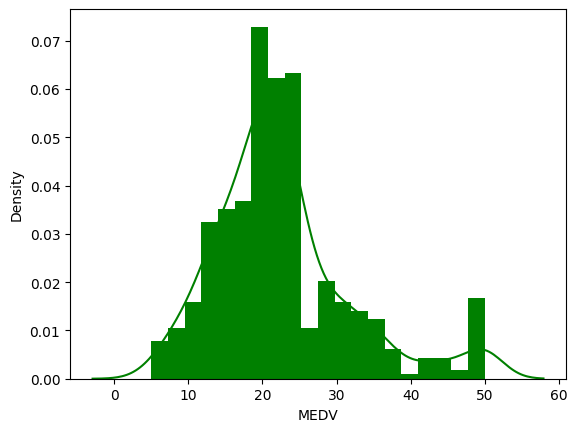

In [30]:
ax3 = sns.distplot(boston_df['MEDV'],
                  bins = 20,
                  kde = True,
                  color = 'green',
                  hist_kws = {'linewidth' : 15, 'alpha':1})
ax.set(xlabel = 'Normal Distribution', ylabel = 'Frequency')

Let's do the levene's test to check the test significance.

In [31]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                 boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

Since the p-value is less to 0.05, we assume that the variances are not equal.

In [32]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                 boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(-3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

Since the p-value is also less to 0.05, we can assume that there is a significantive difference in the prices.

<h3>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</h3>

We can do our hypothesis.

1. $H_0$: There's not difference in median values of houses for each proportion of owner occupide units built prior to 1940.
2. $H_1$: There IS a difference in median values of houses for each proportion of owner occupide units built prior to 1940.

We alredy do the subgroups of the 'AGE' column, and we called it 'age_groups'. Let's do again the Levene's calculate the test significance.

In [33]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                  boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
                  boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                  center = 'mean')

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

Now the p-value is greater that 0.05. We can assume that the equality of the variance.

In [35]:
boston1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
boston2 = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
boston3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [36]:
f_statistic, p_value = scipy.stats.f_oneway(boston1, boston2, boston3)
print('F_Statistic: {0}, P-value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


We can deny the $H_0$ hypothesis, cause the p-value is less that 0.05. There IS a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

<h3>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</h3>

We can see befora that these features have a positive correlation.

In [37]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

Since the p-value is less that 0.05, we reject the null hypothesis. There IS a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

<h3>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</h3>

1. $H_0$: There is no an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
2. $H_1$: There IS an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [38]:
X = boston_df['DIS'] #independent variable
Y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:              sáb., 13 jul. 2024   Prob (F-statistic):           1.21e-08
Time:                        19:27:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value < 0.05, we can reject the null hypothesis. There IS an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes